In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import counts_statistics as cs
import functools as ft
import numpy.linalg as lg
import scipy.optimize as sp
import QPE_Function as qpef
from tkinter import Tcl
from tqdm import tqdm


In [42]:
############################################################### VERIFICATION ANALYSIS ######################################################

# Loading the data files
data_dirs = [r'C:\Users\Experience\Desktop\Multipartite Entanglement Experiment\Data\Private_Quantum_Sensing']
os.chdir(data_dirs[0])
filenames = ["QPE_RealRun_Plus_20250207182043"]
x_data_final = []
fail_list_final = []
fail_error_list = []

for index, file in enumerate(filenames):
    fail_list = []
    s = set()
    measurement_basis = []
    fail_list_error = []
    x_data = []
    n_files = 0
    os.chdir(f"{data_dirs[0]}\{file}\counts")
    file_aux=[i for i in glob.glob("ABCD=*.txt")]
    measurement_basis  =  sorted(file_aux, key = qpef.last_4chars)
    
    for i in range(len(file_aux)):   
        s.add(qpef.last_4chars(file_aux[i]))

    Round_measurement_basis = qpef.separation(measurement_basis,s)
        
    # Defining the non-local game (the sign associated with each stabilizer)
    stabilizers = [
            "iiii",
            "zzii",
            "izzi",
            "iizz",
            "xxxx",
            "zizi",
            "iziz",
            "zzzz",
            "xyyx",
            "yxyx",
            "xxyy",
            "yyxx",
            "ziiz",
            "yxxy",
            "xyxy",
            "yyyy"
        ]
    for i in tqdm(range(1)):
        stab_sign = [1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , -1 , -1 , -1 , -1 , 1 , -1 , -1 , 1 ]
        STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}
        working_dir_data =  data_dirs[0]
        # # We re-calculate the statistics for the randomly selected data
        stats = cs.Operartors_Statistics(4, stabilizers, stab_sign, STABILIZER_TO_INDEX, Round_measurement_basis[-2], data_dirs[0] + "//" + filenames[index] + "//counts")
        writting_dir = working_dir_data + "//test"
        os.makedirs(f"{writting_dir}", exist_ok=True)
        samples_evolution = np.arange(1, stats.n_loops+1, 1)
        p_pass_list,_,p_fail_list,p_fail_error_list,n_samples_list = stats.get_both_probability_evolution(samples_evolution, writting_dir)         
        x_data.append(np.array(n_samples_list, dtype=float))
        fail_list.append(np.array(p_fail_list, dtype=float))
        fail_list_error.append(np.array(p_fail_error_list, dtype=float))
    
    fail_list_final.append(fail_list)
    x_data_final.append(x_data)
    fail_error_list.append(fail_list_error)

100%|██████████| 1/1 [02:23<00:00, 143.45s/it]


In [43]:
fail_list_final

[[array([0.        , 0.        , 0.        , ..., 0.43978796, 0.43984398,
         0.4399    ])]]

TypeError: 'AxesSubplot' object is not iterable

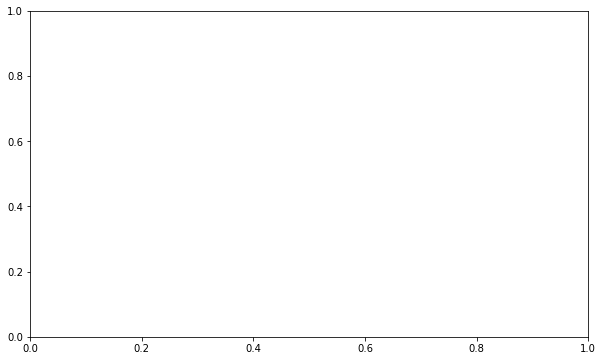

In [35]:
import allantools
from allantools import noise
import matplotlib.pyplot as plt
import numpy as np

def plotallan(ax, y, rate, taus, style, label=None):
    """
    Plots overlapping Allan deviation for the given data on the provided axis.
    """
    t2, ad, ade, adn = allantools.oadev(y, rate=rate, data_type="phase", taus=taus)
    ax.loglog(t2, ad, style, label=label)
    ax.set_xlabel('Sample')
    ax.set_ylabel('Overlapping Allan deviation')
    ax.grid(True, which="both", linestyle='--', linewidth=0.5)
    if label:
        ax.legend()

# Number of datasets
num_datasets = len(fail_list)

# Create subplots
fig, axes = plt.subplots(num_datasets, 1, figsize=(10, 6 * num_datasets), sharex=False)

# Plot each dataset in a separate subplot
for i, (p_fail_list, ax) in enumerate(zip(fail_list_final[0], axes)):
    label = f"Dataset {i+1}"  # Create a label for each dataset
    plotallan(ax, np.array(p_fail_list), 1,x_data[0] , 'b.', label=label)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show all subplots
plt.show()

In [23]:
np.shape(x_data)[0]

2

In [ ]:
print(repr(np.array(results[-1].u1)))
print(repr(np.array(results[-1].u2)))

array([[-0.0804389 +0.00969043j, -0.02377047+0.99642895j],
       [ 0.02377047+0.99642895j, -0.0804389 -0.00969043j]])
array([[ 0.01474904+0.02382648j,  0.00044964+0.9996072j ],
       [-0.00044964+0.9996072j ,  0.01474904-0.02382648j]])


ValueError: x and y must be the same size

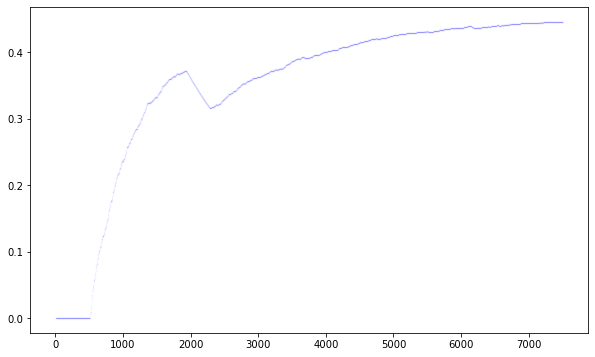

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

# Ensure reproducibility by using a seed if needed
# Ensure reproducibility by using a seed if needed
fail_list_mean_list = [] 
fail_list_mean_error_list = [] 
# Iterate over data files and visualize p_fail_list£
for x_data,fail_list in zip(x_data_final,fail_list_final):
    plt.figure(figsize=(10, 6))
    fail_list_mean = []
    fail_list_mean_error = []

    for i in range(np.shape(x_data)[0]):
        fail_list_mean_value = 0
        fail_list_mean_error_value = 0
        for j in range(np.shape(fail_list)[0]):
            fail_list_mean_value = fail_list_mean_value + fail_list[j][i]
            fail_list_mean_error_value = fail_list_mean_error_value + fail_list_error[j][i]
        fail_list_mean.append(fail_list_mean_value/np.shape(fail_list)[0])
        fail_list_mean_error.append(fail_list_mean_error_value/np.shape(fail_list_error)[0])
    fail_list_mean_list.append(fail_list_mean)
    fail_list_mean_error_list.append(fail_list_mean_error)

   
    for i, p_fail_list in enumerate(fail_list):
        plt.scatter(
            x_data[i],
            p_fail_list,
            s=1,  # Increase scatter size
            alpha=0.01,  # Reduce point opacity for clarity
            label=f"Dataset {i + 1}",
            color = 'b'  # Dynamic legend labels
            
        )
    
    plt.scatter(
    x_data[0],
    fail_list_mean,
    s=5,  # Increase scatter size
    alpha=1,  # Reduce point opacity for clarity
    color = 'r',
    label=f"Dataset {i + 1}")  # Dynamic legend labels

    # Customize plot
    plt.xlim(10)  # Refine x-axis limits
    plt.ylim(0, 0.04)  # Refine y-axis limits for better focus
    plt.grid(True, linestyle="--", alpha=0.6)  # Light gridlines
    plt.xlabel("Sample Evolution", fontsize=14)  # X-axis label
    plt.ylabel("Failure Probability (p_fail)", fontsize=14)  # Y-axis label
    plt.title("Failure Probability vs Sample Evolution", fontsize=16)  # Plot title
    plt.tight_layout()  # Avoid clipping
    plt.show()


In [ ]:
def r_func(epsilon, lamb, failure_rate):
    nu = 1 - lamb
    return failure_rate * (lamb * np.sqrt(2 * nu) + 1) / (nu * epsilon) - lamb * np.sqrt(2 * nu)

def r_bound(epsilon, lamb, failure_rate):
    return 1 - r_func(epsilon, lamb, failure_rate)

def epsilon_func(epsilon):
    return epsilon

def N_bound(epsilon, lamb, delta, failure_rate):
    nu = 1 - lamb
    r = r_func(epsilon, lamb, failure_rate)
    N_min = ((np.log(1/delta) + 4*lamb*nu**2)/epsilon)*((lamb*np.sqrt(2*nu) + r)/(lamb*nu*(1 - r)))**2
    return N_min

def const(epsilon, lamb, delta, failure_rate, N):
    return N - N_bound(epsilon, lamb, delta, failure_rate)

def get_epsilon(lamb, delta, N, failure_rate):
    func = epsilon_func
    cons = [{'type': 'ineq', 'fun': const, 'args': (lamb, delta, failure_rate, N)},
            {'type': 'ineq', 'fun': r_func, 'args': (lamb, failure_rate)},
            {'type': 'ineq', 'fun': r_bound, 'args': (lamb, failure_rate)}]
    epsilon_ini_guess = 0.1

    epsilon_solution = sp.minimize(func,
                                epsilon_ini_guess,
                                method='COBYLA',
                                bounds = ((0.,1.),),
                                constraints = cons)
    return epsilon_solution.x

In [ ]:
import matplotlib.pyplot as plt

significance_data = []
lamb = 1/2
nu = 1/2
r = 0.4

for x_data,fail_list in zip(x_data_final,fail_list_final):
    epsilon_mean = []
    fail_list_mean = []

    for i in range(np.shape(x_data)[1]):
        fail_list_mean_value = 0
        for j in range(np.shape(fail_list)[0]):
            fail_list_mean_value = fail_list_mean_value + fail_list[j][i]
        fail_list_mean.append(fail_list_mean_value/np.shape(fail_list)[0])

    #plt.figure(figsize=(10, 6))  # Adjust figure size for better readability

    #for j in range(np.shape(fail_list)[0]):
        #epsilon_data = []
        #for i in range(len(fail_list[j])):
            #epsilon_data.append(qpef.calculate_epsilon(fail_list[j][i], lamb, nu, r))    
        # Use a colormap for better differentiation and transparency to reduce clutter
        #plt.scatter(x_data[j], epsilon_data, s=1, alpha=0.01, label=f"{j + 1}",color = 'g')

    for i in range(len(fail_list_mean)):
        epsilon_mean.append(qpef.calculate_epsilon(fail_list_mean[i], lamb, nu, r))
    
    #plt.scatter(x_data[0], epsilon_mean, s=5, alpha=1, color = 'r')
    print(epsilon_mean[-1])


    # Add axis labels, title, and legend
    plt.xlabel("Sample Evolution")
    plt.ylabel("Epsilon Data")
    plt.title("Scatter Plot of Epsilon Data vs Sample Evolution")
    plt.grid()
    plt.tight_layout()


In [ ]:
get_epsilon(lamb,delta,10000,0.0173)

In [ ]:
import matplotlib.pyplot as plt

lamb = 1/2
nu = 1/2
r = 0.4

for x_data,fail_list in zip(x_data_final,fail_list_final):
    significance_mean = []
    epsilon_mean = []
    fail_list_mean = []
    for i in range(np.shape(x_data)[1]):
        fail_list_mean_value = 0
        for j in range(np.shape(fail_list)[0]):
            fail_list_mean_value = fail_list_mean_value + fail_list[j][i]
        fail_list_mean.append(fail_list_mean_value/np.shape(fail_list)[0])
    
    plt.figure(figsize=(10, 6))

    for j in range(np.shape(fail_list)[0]):
        epsilon_data = []
        significance_data = []
        for i in range(len(fail_list[j])):
            epsilon_data.append(qpef.calculate_epsilon(fail_list[j][i], lamb, nu, r))
            significance_data.append(qpef.calculate_delta(x_data[j][i], epsilon_data[i], r,lamb, nu))   
        # Use a colormap for better differentiation and transparency to reduce clutter
        plt.scatter(x_data[j], significance_data, s=1, alpha=0.01, label=f"{j + 1}",color = 'y')

    for i in range(len(fail_list_mean)):
        epsilon_mean.append(qpef.calculate_epsilon(fail_list_mean[i], lamb, nu, r))
        significance_mean.append(qpef.calculate_delta(x_data[j][i], epsilon_mean[i], r,lamb, nu))
    
    plt.scatter(x_data[0], significance_mean, s=5, alpha=1, color = 'r')
    print(significance_mean[-1])

        
    # Add axis labels, title, and legend
    plt.xlabel("Sample Evolution")
    plt.ylabel("Significance level")
    plt.title("Scatter Plot of Siginificance Level vs Sample Evolution")
    plt.grid()
    plt.xlim(4000)
    plt.ylim(0,0.2)
    plt.tight_layout()
    plt.xscale('log')


In [ ]:
N = np.linspace(1,400000)
significance_data = []
for i in range(len(N)):
    significance_data.append(qpef.calculate_delta(N[i], 0.0, 0.7, lamb, nu))

plt.plot(N,significance_data)

In [ ]:
for i in range(len(significance_data)):
    plt.scatter(significance_data,qpef.N_rob(0.08, 0.7, lamb, nu, significance_data[i]) - N)

In [10]:
############################################################### PHASE ESTIMATION ANALYSIS GHZ ######################################################

data_dirs = [r'C:\Users\Experience\Desktop\Multipartite Entanglement Experiment\Data\Private_Quantum_Sensing']
os.chdir(data_dirs[0])
filenames = ["COMPLETE_QPE_FIRST_RUN","COMPLETE_QPE_SECOND_RUN","COMPLETE_QPE_THIRD_RUN","COMPLETE_QPE_FOURTH_RUN","COMPLETE_QPE_FIFTH_RUNS","COMPLETE_QPE_SIXTH_RUN"]

data_dirs = [r'C:\Users\Experience\Desktop\Multipartite Entanglement Experiment\Data\Phase_stats']
os.chdir(data_dirs[0])
filenames = ["COMPLETE_QPE_FIRST_RUN_20241221183632","COMPLETE_QPE_SECOND_RUN_202412261154","COMPLETE_QPE_THIRD_RUN_20241229165806","COMPLETE_QPE_FOURTH_RUN_20250101232850","COMPLETE_QPE_FIFTH_RUN_20250108030226","COMPLETE_QPE_SIXTH_RUN_20250114015928"]




In [16]:
############################################################### PHASE ESTIMATION ANALYSIS BELL######################################################

data_dirs = [r'C:\Users\Experience\Desktop\Multipartite Entanglement Experiment\Data\Private_Quantum_Sensing']
os.chdir(data_dirs[0])
filenames = ["COMPLETE_QPE_BELL_FIRST_RUN","COMPLETE_QPE_BELL_SECOND_RUN","COMPLETE_QPE_BELL_THIRD_RUN"]

data_dirs = [r'C:\Users\Experience\Desktop\Multipartite Entanglement Experiment\Data\Phase_stats']
os.chdir(data_dirs[0])
filenames = ["COMPLETE_QPE_BELL_FIRST_RUN_20250129175719","COMPLETE_QPE_BELL_SECOND_RUN_20250129230913","COMPLETE_QPE_BELL_THIRD_RUN_20250203010747"]

In [11]:
P_plus_list = []
P_minus_list = []
P_plus_error_list = []
P_minus_error_list = []
n_samples_list_list = []
measurement_basis = []
Measurement = []
n_files = 0

for index, file in enumerate(filenames):
    os.chdir(f"{data_dirs[0]}\{file}\counts")
    file_aux=[i for i in glob.glob("Phase*.txt")]
    measurement_basis  = file_aux
    stabilizers =['xxxx']   

    stab_sign = [1]
    STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}
    working_dir_data =  data_dirs[0]
    # # We re-calculate the statistics for the randomly selected data
    stats = cs.Operartors_Statistics(4, stabilizers, stab_sign, STABILIZER_TO_INDEX, measurement_basis, data_dirs[0] + "\\" + filenames[index] + "\counts",set_loops=1)
    writting_dir = working_dir_data + "//test"
    os.makedirs(f"{writting_dir}", exist_ok=True)
    stats.shuffle_data()
    samples_evolution = np.arange(1, stats.n_loops+1, 1)
    P_plus,P_plus_error,P_minus,P_minus_error,n_samples_list = stats.get_both_probability_evolution(samples_evolution, writting_dir)
    Measurement.append(stats.measurement)
    P_plus_list.append(P_plus)
    P_minus_list.append(P_minus)
    P_plus_error_list.append(P_plus_error)
    P_minus_error_list.append(P_minus_error)
    n_samples_list_list.append(n_samples_list)


No handles with labels found to put in legend.


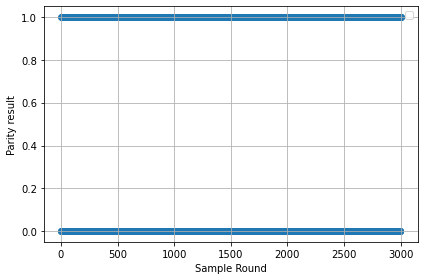

No handles with labels found to put in legend.


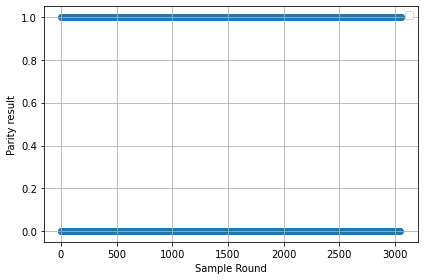

No handles with labels found to put in legend.


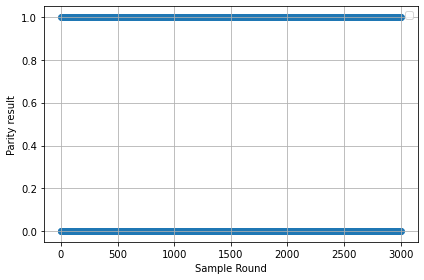

No handles with labels found to put in legend.


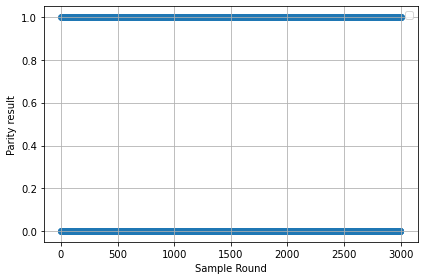

No handles with labels found to put in legend.


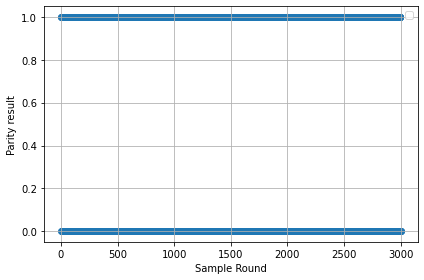

No handles with labels found to put in legend.


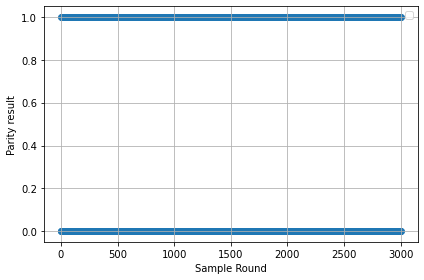

In [4]:
for i in (range(len(n_samples_list_list))):
    plt.scatter(n_samples_list_list[i],Measurement[i])
    plt.xlabel("Sample Round")
    plt.ylabel("Parity result")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()



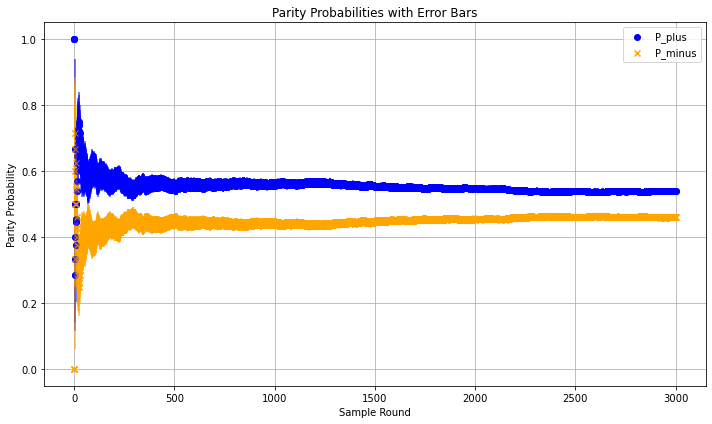

No handles with labels found to put in legend.


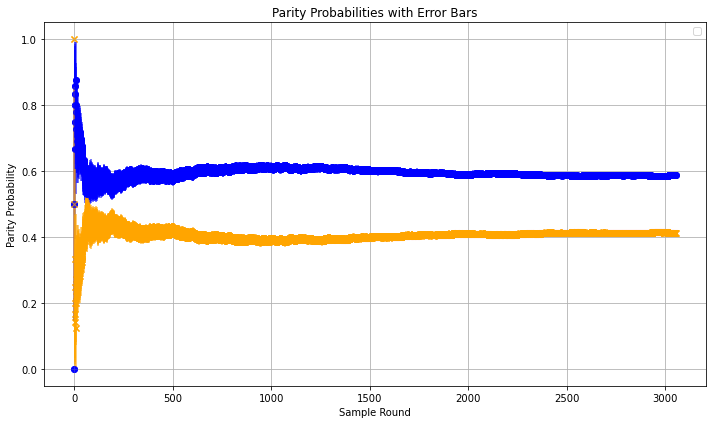

No handles with labels found to put in legend.


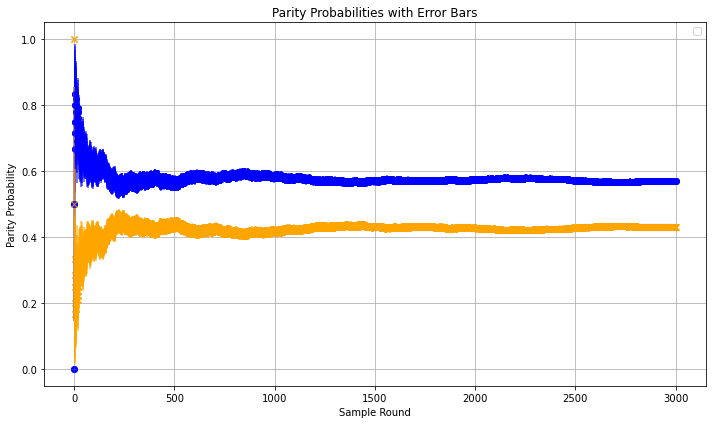

No handles with labels found to put in legend.


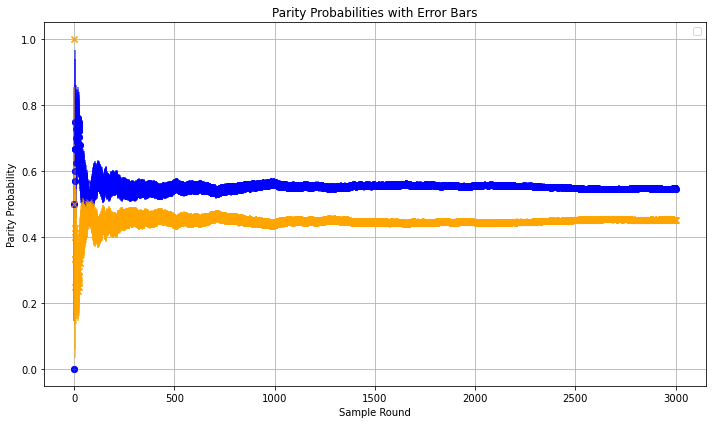

No handles with labels found to put in legend.


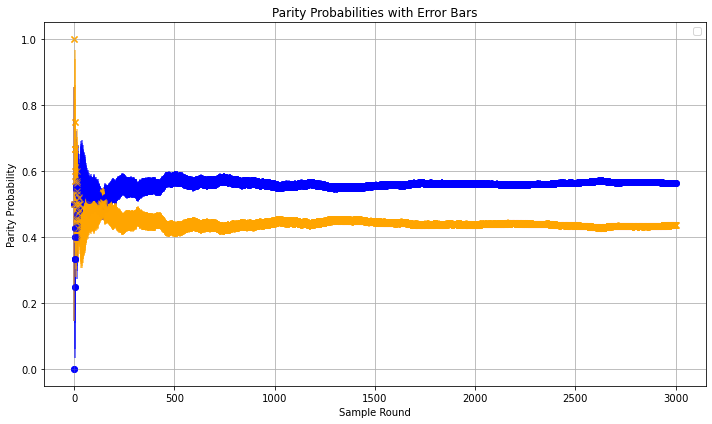

No handles with labels found to put in legend.


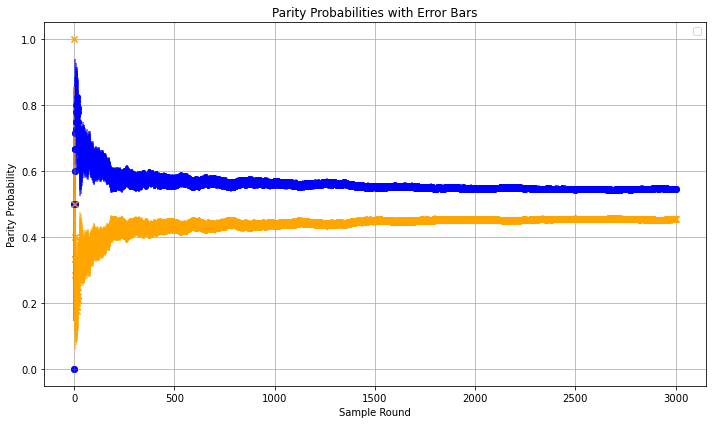

In [5]:

# Create a single plot with both P_plus and P_minus data

# Loop through each sample round and plot data

for i, samples in enumerate(n_samples_list_list):
    plt.figure(figsize=(10, 6))  # Set the figure size for better visibility

    # Scatter plot for P_plus and P_minus
    plt.scatter(samples, P_plus_list[i], color='blue', label='P_plus' if i == 0 else "", marker='o')
    plt.scatter(samples, P_minus_list[i], color='orange', label='P_minus' if i == 0 else "", marker='x')

    # Error bars for P_plus and P_minus
    plt.errorbar(samples, P_plus_list[i], yerr=P_plus_error_list[i], fmt='o', color='blue', alpha=0.7)
    plt.errorbar(samples, P_minus_list[i], yerr=P_minus_error_list[i], fmt='x', color='orange', alpha=0.7)

    # Add labels, legend, and grid
    plt.xlabel("Sample Round")
    plt.ylabel("Parity Probability")
    plt.title("Parity Probabilities with Error Bars")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Display the plot
    plt.show()





In [6]:
def derivate_theta_P(P,F,N):
    V = 1-F
    return -(2/(N*V*np.sqrt(1-((2*P-1)**2)/(V**2))))

def derivate_theta_F(P,F,N):
    V = 1-F
    return (2*P-1)/(N*(V**2)*np.sqrt(1-((2*P-1)**2)/V**2))

In [13]:
# Calculate average failure rate
#result = sum([fail[-1] for fail in fail_list_final]) / len(fail_list_final)

# Initialize lists to store results
theta_mle = []
theta_inverse = []
theta_inverse_error = []
std_theta = []
#minu = [1134,1048,933,968,1235,859]
minu = [-1,-1,-1,-1,-1,-1]
# Iterate through each sample list
for i, samples in enumerate(n_samples_list_list):
    N = 4  # Number of samples
    Y_init = np.pi/8 # Initial guess for optimization
    F =  fail_list_mean_list[i]# Failure rate parameter

    # Perform optimization to find maximum likelihood estimate (MLE)
    initial_guess = sp.minimize(
        qpef.Maximun_Likelihood,
        Y_init,
        args=(np.real(1 - F), N, np.array(Measurement[i])),
        method='Nelder-Mead',
        bounds = [0,np.pi/8]
    ).x[0]

    mle = sp.minimize(
        qpef.Maximun_Likelihood,
        initial_guess,
        args=(np.real(1 - F), N, np.array(Measurement[i])),
        method='Nelder-Mead',
        bounds = [0,np.pi/8]
    ).x[0]

    theta_mle.append(mle)

    # Compute inverse probability
    theta_inverse_value = qpef.Prob(P_minus_list[i][minu[i]], N, 1 - F, signe=False)
    theta_inverse.append(theta_inverse_value)
    d_theta_dP = derivate_theta_P(P_minus_list[i][minu[i]],F,N)
    d_theta_dF = derivate_theta_F(P_minus_list[i][minu[i]],F,N)
    #theta_inverse_error.append(np.sqrt(((d_theta_dP*P_plus_error_list[i][minu[i]])**2)+((d_theta_dF*fail_list_mean_error_list[i][minu[i]])**2)))

# Calculate mean and standard deviation of MLE
theta_mean = np.mean(theta_inverse)
std_theta.append(qpef.STD(theta_mean, theta_mle))

# Plot results
plt.figure(figsize=(10, 6))  # Set figure size for better readability
plt.plot(N * np.array(theta_mle) % np.pi, label="Theta MLE", marker='o', linestyle='-')
plt.plot(N * np.array(theta_inverse) % np.pi, label="Theta inv", marker='o', linestyle='-')

#plt.errorbar(x=[0,1,2,3,4,5],y= N * np.array(theta_inverse) % np.pi, yerr=N * np.array(theta_inverse_error) % np.pi, fmt='x', color='orange', alpha=1)

plt.axhline(N * theta_mean % np.pi, color='red', linestyle='--', label=f"Mean Theta (N * {theta_mean:.2f} mod π)")
plt.axhline(np.pi/2, color='blue', linestyle='--', label=f"true theta")


# Add labels, legend, and title
plt.xlabel("Sample Index")
plt.ylabel("Theta (mod π)")
plt.title("Theta MLE and Mean Theta")
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()


NameError: name 'fail_list_mean_list' is not defined

In [ ]:
print(N * np.array(theta_mle) % np.pi)

NameError: name 'N' is not defined

In [14]:

fisher_Inv = []
fisher_MLE = []
fisher_Ref = []
fisher_matrix = []
Theta_variance = []

fail_list_mean_list = [0.0173, 0.0201, 0.0152, 0.0144, 0.0152, 0.0142]

def fisher(V,theta):
    return(((V**2)*(4**2)*(np.sin(4*theta)**2))/(1-(V**2)*(np.cos(4*theta)**2)))

for i, samples in enumerate(n_samples_list_list):
    N = 4  # Number of samples
    Y_init = np.pi  # Initial guess for optimization
    F =  fail_list_mean_list[i]
    fisher_Inv.append(fisher(1-F,theta_inverse[i])*30)
    fisher_Ref.append(fisher(1,np.pi/8))
    fisher_matrix.append(fisher(1-F,theta_inverse[i])*np.ones((4,4)))
    Theta_variance.append(1/(fisher_Inv[i]))
    
# Plot the results
plt.figure(figsize=(10, 6))  # Set figure size for better visibility
for label, data in [('Fisher Inverse', fisher_Inv)]:
    plt.plot(
        [1, 2, 3], 
        data, 
        label=label, 
        color='blue', 
        marker='o', 
        linestyle='-', 
        linewidth=2, 
        markersize=8
    )

# Add a reference line
plt.axhline(fisher(1, np.pi / 8)*30, color='red', linestyle='--', linewidth=2, label='Reference')

# Add labels, title, legend, and grid
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Fisher Information', fontsize=14)
plt.title('Fisher Information Analysis', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(alpha=0.4, linestyle='--')

# Enhance x and y limits if needed
plt.xlim(1, 6)

# Show the plot
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))  # Set figure size for better visibility
for label, data in [('RMSE', Theta_variance)]:
    plt.plot(
        [1, 2, 3, 4, 5, 6], 
        data, 
        label=label, 
        color='blue', 
        marker='o', 
        linestyle='-', 
        linewidth=2, 
        markersize=8
    )

# Add labels, title, legend, and grid
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4, linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()





IndexError: list index out of range

1134
2.2689409085006598e-05
Done.


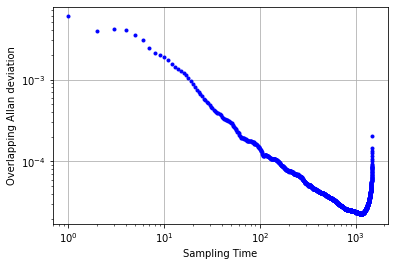

1048
3.0454353505252662e-05
Done.


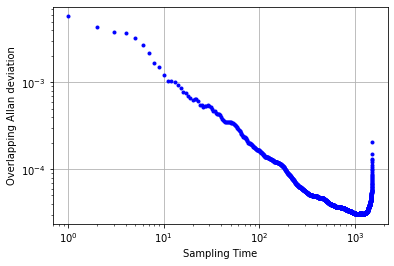

933
2.5535663405550646e-05
Done.


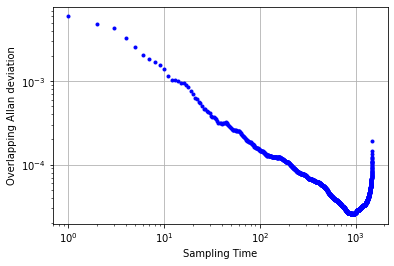

968
2.3800954745811828e-05
Done.


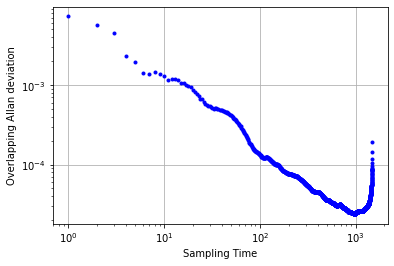

1235
2.124034154509032e-05
Done.


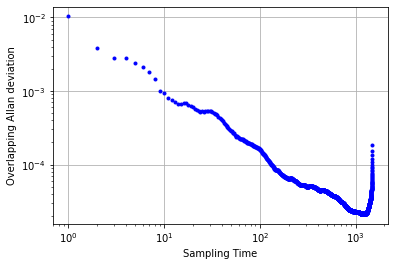

859
2.8490336534193714e-05
Done.


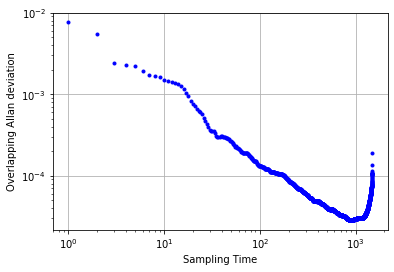

In [16]:
import allantools
from allantools import noise
import matplotlib.pyplot as plt
import numpy as np

import allantools
from allantools import noise

def plotallan(plt, y, rate, taus, style):
    (t2, ad, ade, adn) = allantools.oadev(y, rate=rate, data_type="phase", taus=taus)
    print(min(ad))
    plt.loglog(t2, ad, style)

for i in range(len(P_plus_list)):
    (t2, ad, ade, adn) = allantools.oadev(P_plus_list[i], rate=1, data_type="phase", taus="all")
    minu= np.argmin(ad)
    print(minu)
    plotallan(plt,np.array(P_plus_list[i]) , 1, samples, 'b.')

    plt.xlabel('Sampling Time')
    plt.ylabel('Overlapping Allan deviation')
    print("Done.")
    plt.grid()
    plt.show()

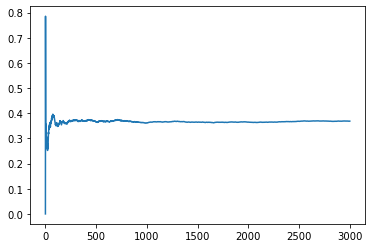

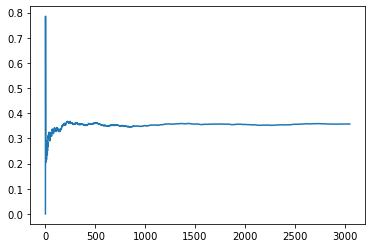

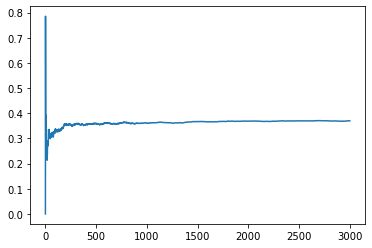

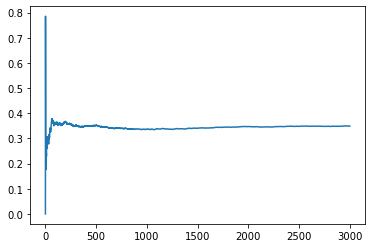

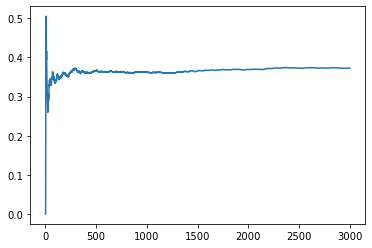

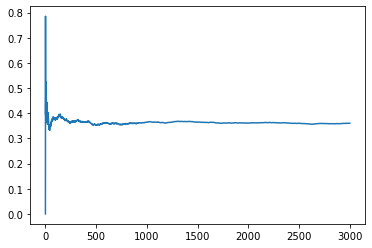

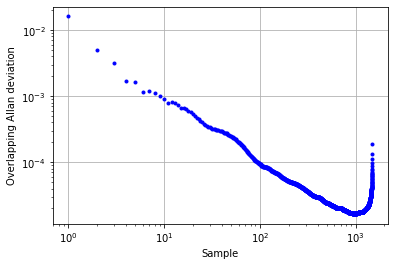

No handles with labels found to put in legend.


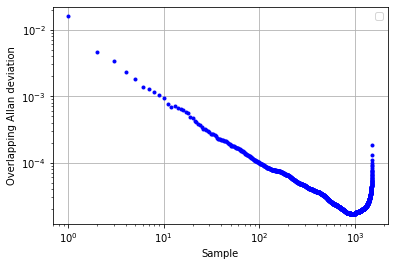

No handles with labels found to put in legend.


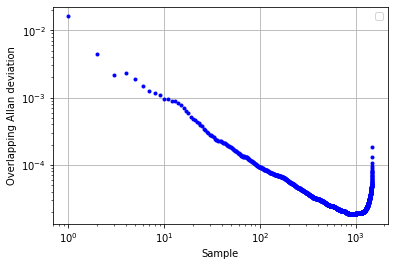

No handles with labels found to put in legend.


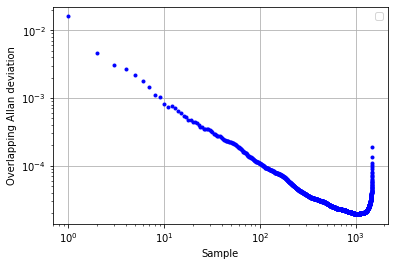

No handles with labels found to put in legend.


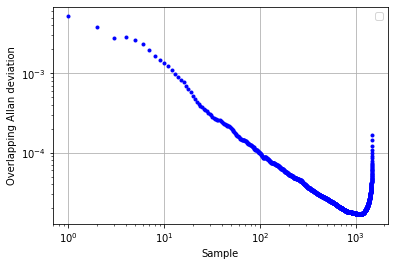

No handles with labels found to put in legend.


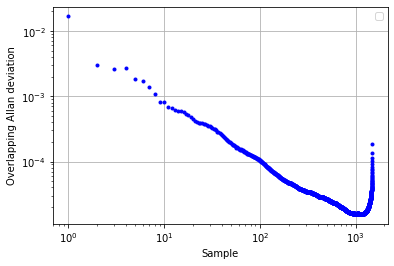

No handles with labels found to put in legend.


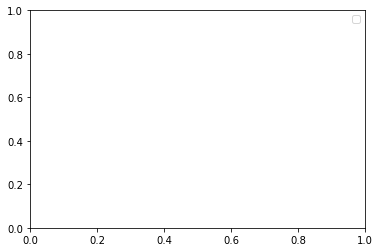

In [46]:
# Calculate average failure rate
#result = sum([fail[-1] for fail in fail_list_final]) / len(fail_list_final)

def generate_angles_in_radians():
    """
    Génère 4 angles en radians dont la somme est un multiple de π,
    avec les trois premiers angles générés aléatoirement.
    """
    # Générer aléatoirement trois angles dans l'intervalle [0, π)
    angles = [np.random.uniform(0, 2*np.pi) for _ in range(3)]
    
    # Calculer le quatrième angle pour que la somme soit un multiple de π
    total = sum(angles)
    remainder = total % np.pi
    fourth_angle = (np.pi - remainder) if remainder != 0 else 0

    # S'assurer que le quatrième angle est dans l'intervalle [0, π)
    if fourth_angle <= 0 or fourth_angle >= np.pi:
        return generate_angles_in_radians()

    angles.append(fourth_angle)
    return angles

# Initialize lists to store results
np.random.shuffle(Measurement)
theta_list = []
Y_init = np.linspace(0,np.pi/4, num = 10)
fail_list_mean_list = [0.0173, 0.0201, 0.0152, 0.0144, 0.0152, 0.0142]
# Iterate through each sample list
for i, samples in enumerate(n_samples_list_list):
    N = 4  # Number of samples
    F = fail_list_mean_list[i] # Failure rate parameter
    theta = []
    for z in range(len(samples)):
        Min = [] 
        theta_mle = []
        for w in range(len(Y_init)):
        # Perform optimization to find maximum likelihood estimate (MLE)
            mle = sp.minimize(
                qpef.Maximun_Likelihood,
                Y_init[w],
                args=(np.real(1 - F), N, np.array(Measurement[i][:z])),
                method='SLSQP',
                bounds = [(0,np.pi/4)]
            )
            theta_mle.append(mle.x[0])
            Min.append(mle.fun)

# Calculate mean and standard deviation of MLE

        theta.append(theta_mle[Min.index(min(Min))])
    theta_list.append(theta)

# Plot results
def plotallan(plt, y, rate, taus, style,label):
    (t2, ad, ade, adn) = allantools.oadev(y, rate=rate, data_type="phase", taus=taus)
    plt.loglog(t2, ad, style,label = label)

for i in range(len(theta_list)):
    plt.plot(theta_list[i])
    plt.show()

for i in range(len(theta_list)):
    plotallan(plt,np.array(theta_list[i]) , 1, "all" , 'b.', label = 'Theta')
    plt.xlabel('Sample')
    plt.ylabel('Overlapping Allan deviation')
    plt.grid()
    plt.show()
    plt.legend()


<string>:53: SyntaxWarning: invalid escape sequence '\{'
<>:53: SyntaxWarning: invalid escape sequence '\{'
<string>:53: SyntaxWarning: invalid escape sequence '\{'
<>:53: SyntaxWarning: invalid escape sequence '\{'
C:\Users\Experience\AppData\Local\Temp\ipykernel_37352\3106761610.py:53: SyntaxWarning: invalid escape sequence '\{'
  os.chdir(f'{working_dir_data}\{file}')


1134.0
1048.0
933.0
968.0
1235.0
859.0


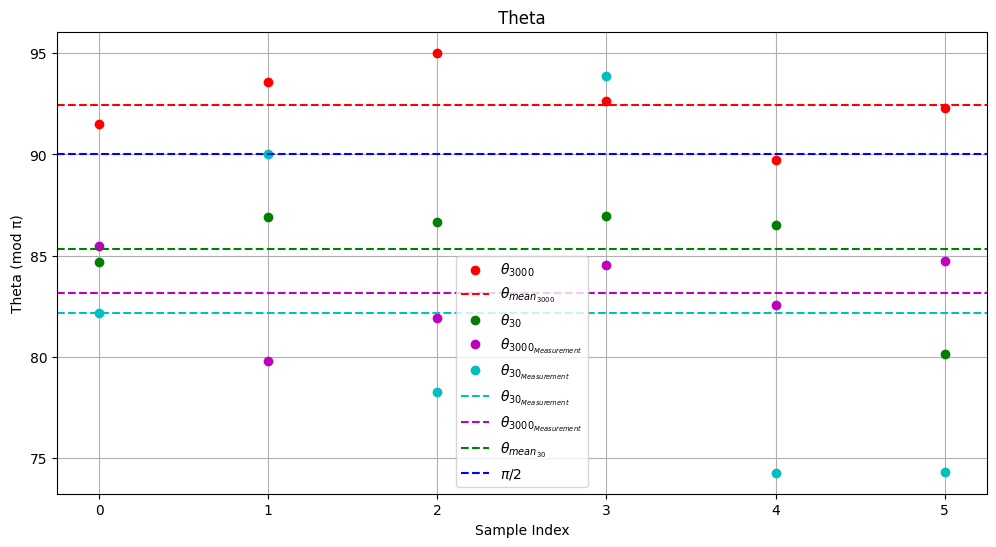

In [ ]:
############## FINAL ANGLE PLOT ################
import numpy as np 
import scipy.optimize as sp
import functools as ft 
import QPE_Noise as qp_n
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
import QPE_Function as qpef
import glob
import os

def generate_angles_in_radians():
    """
    Génère 4 angles en radians dont la somme est un multiple de π,
    avec les trois premiers angles générés aléatoirement.
    """
    # Générer aléatoirement trois angles dans l'intervalle [0, π)
    angles = [np.random.uniform(0, 2*np.pi) for _ in range(3)]
    
    # Calculer le quatrième angle pour que la somme soit un multiple de π
    total = sum(angles)
    remainder = total % np.pi
    fourth_angle = (np.pi - remainder) if remainder != 0 else 0

    # S'assurer que le quatrième angle est dans l'intervalle [0, π)
    if fourth_angle <= 0 or fourth_angle >= np.pi:
        return generate_angles_in_radians()

    angles.append(fourth_angle)
    return angles

def Maximun_Likelihood_Matrix(Theta, frequency, RHO) :
    
    sigma_x = (1/np.sqrt(2))*np.matrix([[1,1],[1,-1]])
    Rho_Theta = np.array(ft.reduce(np.kron,(sigma_x,sigma_x,sigma_x,sigma_x))@qp_n.apply_angle(RHO,Theta)@ft.reduce(np.kron,(sigma_x,sigma_x,sigma_x,sigma_x)))
    Dis_prob =  Rho_Theta.diagonal()*frequency

    return(-sum(np.log(Dis_prob,out=np.zeros_like(Dis_prob, dtype=np.complex128), where=(Dis_prob!=0))))

counts = []
density_matrix_30 = []
density_matrix_3000 = []

working_dir_data = r"C:\Users\Experience\Desktop\Multipartite Entanglement Experiment\Data\QST"

filenames = [['QST_GHZ_aqtime=100.0s_20241221110125','QST_GHZ_aqtime=100.0s_20241226090240','QST_GHZ_aqtime=100.0s_20241229140510','QST_GHZ_aqtime=100.0s_20250101203050','QST_GHZ_aqtime=100.0s_20250108191319','QST_GHZ_aqtime=100.0s_20250110223506']
             ,['QST_GHZ_aqtime=100.0s_20241217192503','QST_GHZ_aqtime=100.0s_20241221110125','QST_GHZ_aqtime=100.0s_20241226090240','QST_GHZ_aqtime=100.0s_20250101203050','QST_GHZ_aqtime=100.0s_20250106105201','QST_GHZ_aqtime=100.0s_20250110223506']]

plt.figure(figsize= (12,6))

for index, file in enumerate(filenames[1]):
    os.chdir(f'{working_dir_data}\{file}')
    with open('density.npy','rb') as f:
        density_matrix_30.append(np.load(f))

for index, file in enumerate(filenames[0]):
    os.chdir(f'{working_dir_data}//{file}')
    with open('density.npy','rb') as f:
        density_matrix_3000.append(np.load(f))


working_dir_data = r"C:\Users\Experience\Desktop\Multipartite Entanglement Experiment\Data\Phase_stats"
filenames = ["COMPLETE_QPE_FIRST_RUN_20241221183632","COMPLETE_QPE_SECOND_RUN_202412261154","COMPLETE_QPE_THIRD_RUN_20241229165806","COMPLETE_QPE_FOURTH_RUN_20250101232850","COMPLETE_QPE_FIFTH_RUN_20250108030226","COMPLETE_QPE_SIXTH_RUN_20250114015928"]
os.chdir(working_dir_data)
        
counts_array = []
counts_array_list = []

minu = [1134,1048,933,968,1235,859]

for index, file in enumerate(filenames):
        os.chdir(f'{working_dir_data}\\{file}\\counts')
        fi = [i for i in glob.glob("Phase*")]
        counts_array = []
        for files in fi[:minu[index]] :
            with open(files) as file:
                for line in file:
                    counts.append(line.split())
                    counts_array.append(np.array(counts[-1][:16], dtype=float))
        counts_array_list.append(counts_array)
    
final_angle =[]
Y_init = []

for i in range(300):
    Y_init.append(generate_angles_in_radians())

for i in range(len(filenames)):
    angle = []
    Min = []
    Rho_Exp = density_matrix_3000[i]
    frequency = sum(counts_array_list[i])
    print(sum(frequency))
    for z in range(len(Y_init)):
        solution = sp.minimize(Maximun_Likelihood_Matrix,Y_init[z],args=(frequency,Rho_Exp),options={'maxiter' : 10000000},constraints=[{'type': 'ineq', 'fun': lambda x : np.pi/8 - sum(x)}])
        angle.append(np.real(sum(solution.x))%np.pi)
        Min.append(solution.fun)
    final_angle.append(angle[Min.index(min(Min))]*180/np.pi)
final_angle_mean = np.mean(final_angle)
# Set figure size for better readability
plt.plot(np.array(final_angle),'o', label=r'$\theta_{3000}$',color = 'r')
plt.axhline(final_angle_mean,color = 'r',linestyle='--',label = r'$\theta_{mean_{3000}}$')

counts = []
final_angle =[]
counts_array = []
counts_array_list = []

working_dir_data = r'C:\Users\Experience\Desktop\Multipartite Entanglement Experiment\Data\Private_Quantum_Sensing'
os.chdir(working_dir_data)
filenames = ["COMPLETE_QPE_FIRST_RUN","COMPLETE_QPE_SECOND_RUN","COMPLETE_QPE_THIRD_RUN","COMPLETE_QPE_FOURTH_RUN","COMPLETE_QPE_FIFTH_RUNS","COMPLETE_QPE_SIXTH_RUN"]

for index, file in enumerate(filenames):
        os.chdir(f'{working_dir_data}\\{file}\\counts')
        fi = [i for i in glob.glob("Phase*")]
        counts_array = []
        for files in fi :
            with open(files) as file:
                for line in file:
                    counts.append(line.split())
                    counts_array.append(np.array(counts[-1][:16], dtype=float))
        counts_array_list.append(counts_array)

for i in range(len(filenames)):
    angle = []
    Min = []
    Rho_Exp = density_matrix_30[i]
    frequency = sum(counts_array_list[i])
    #print(np.real(sum(sp.minimize(Maximun_Likelihood_Matrix,Y_init,args=(frequency,Rho_Exp), method = 'Powell',tol=1e-10,options={'maxiter' : 10000000}).x))% np.pi)
    for z in range(len(Y_init)):
        solution = sp.minimize(Maximun_Likelihood_Matrix,Y_init[z],args=(frequency,Rho_Exp),options={'maxiter' : 10000000},constraints=[{'type': 'ineq', 'fun': lambda x : np.pi/8 - sum(x)}])
        angle.append(np.real(sum(solution.x))%np.pi)
        Min.append(solution.fun)
    final_angle.append(angle[Min.index(min(Min))]*180/np.pi)
final_angle_mean = np.mean(final_angle)


# Set figure size for better readability

plt.plot(np.array(final_angle), 'o',label=r'$\theta_{30}$',color = 'g')

plt.plot(np.array([1.49202008, 1.39263663 ,1.4295199  ,1.47527766 ,1.4411346  ,1.47869336])*180/np.pi,'o',label = r'$\theta_{3000_{Measurement}}$',color = 'm' )

plt.plot(np.array([1.43457883, 1.57079633, 1.36616329, 1.63859828, 1.29652056, 1.29682736])*180/np.pi,'o',label = r'$\theta_{30_{Measurement}}$' ,color = 'c')

plt.axhline(np.mean([1.43457883, 1.57079633, 1.36616329, 1.63859828, 1.29652056, 1.29682736])*180/np.pi,color = 'c',linestyle='--',label = r'$\theta_{30_{Measurement}}$')

plt.axhline(np.mean([1.49202008,1.39263663,1.4295199,1.47527766,1.4411346,1.47869336])*180/np.pi,color = 'm',linestyle='--',label = r'$\theta_{3000_{Measurement}}$')


# Add labels, legend, and title
plt.axhline(final_angle_mean,color = 'g',linestyle='--',label = r'$\theta_{mean_{30}}$')
plt.axhline(np.pi/2*180/np.pi, color='b', linestyle='--', label=r"$\pi/2$")
plt.xlabel("Sample Index")
plt.ylabel("Theta (mod π)")
plt.title("Theta")
plt.legend()
plt.grid(True)  # Add grid for better readability

plt.show()

